<a href="https://colab.research.google.com/github/Tejeswini-98/CLASS-NOTE-ML-ALGORITHMNS/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Necessary libraries

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [ ]:
newspaper_data = pd.read_csv('NewspaperData.csv')
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## 3. Data Understanding

### 3.1 Initial Analysis

In [ ]:
newspaper_data.shape

(34, 3)

In [ ]:
newspaper_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [ ]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

### 3.2 ASSUMPTIONS CHECK

#### 1. Normality Test

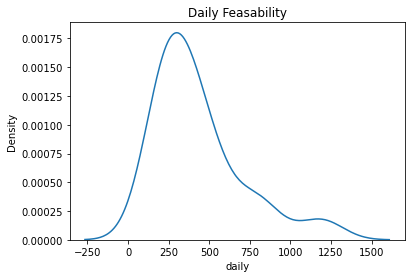

In [ ]:
sns.distplot(a=newspaper_data['daily'],hist=False)
plt.title('Daily Feasability')
plt.show()

In [ ]:
newspaper_data['daily'].skew()

1.5321591323040094

In [ ]:
newspaper_data['daily'].kurtosis()

1.999034084097406

### Normality Test is FAILED.

### 2. Linearity Test

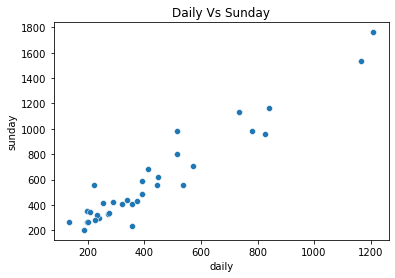

In [ ]:
sns.scatterplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

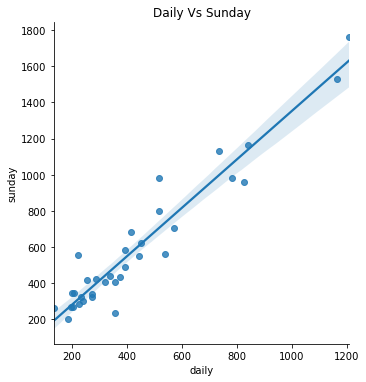

In [ ]:
sns.lmplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

### Linearity Test also failed.

### 3. Multicollinearity Test 

We cannot perform here as we are having onlu one input feature.

### 4. AutoRegression Test

We cannot perform here as we are having only one input feature and that is also not time based feature.

### 5. Homoscedasticity Test | 6. Zero Residual Mean Test 

These 2 Tests can be ony performed post model Training.

# 4. Data Preparation

In [ ]:
del newspaper_data['Newspaper']

In [ ]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [ ]:
newspaper_data.isna().sum()

daily     0
sunday    0
dtype: int64

In [ ]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

#### NOTE:

Linear Regression can be performed by using 2 libraries:

**1. Statsmodels - OLS[Ordinary Least Square]**

**2. sklearn - LinearRegression()**

# 5. Model Building || 6. Model Training Using Statsmodels

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
linear_model = smf.ols(formula = 'sunday~daily',data = newspaper_data).fit()

In [ ]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

# 7. Model Testing

### Manual Testing

y = mx +c 

If x = 200, y = ?
If x = 350, y = ?
If x = 420, y = ?

In [ ]:
(1.339715*200) + 13.835630

281.77862999999996

In [ ]:
(1.339715*350) + 13.835630

482.73587999999995

In [ ]:
(1.339715*420) + 13.835630

576.51593

#### Machine Prediction

In [ ]:
test_data = pd.DataFrame(data={'daily':[200,350,420]})
test_data

,daily
0,200
1,350
2,420


In [ ]:
linear_model.predict(test_data)

0    281.778581
1    482.735795
2    576.515828
dtype: float64

# 8. Model Evaluation

#### PARK

# 9. Model Deployement

In [ ]:
from pickle import dump

In [ ]:
dump(linear_model,open('model.pkl','wb'))

In [ ]:
from pickle import load

In [ ]:
loaded_model = load(open('model.pkl','rb'))

In [ ]:
loaded_model.predict(test_data)

0    281.778581
1    482.735795
2    576.515828
dtype: float64

# THE END